In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.stats import norm

In [11]:
#height = w ,center = μ,width = σ，offset = basevalue
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def two_gaussians(x, h1, w1, h2, w2, offset):
    return (gaussian(x, h1, 1.46, w1, offset=0) + gaussian(x, h2, 1.54, w2, offset=0) + offset)

# calculate err 
errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

In [3]:
### load data
a = np.genfromtxt('../../rdf.txt')
data = a[128:187,:]

# test data 
np.random.seed(100)
x = np.linspace(0, 3, 100)
y1 = norm.pdf(x, 1.2, 0.3)
y2 = norm.pdf(x, 1.8, 0.3)
y_noise = 0.02 * np.random.normal(size=x.size)
date = 0.4*y1 + 0.6*y2 + y_noise 
data = np.stack((x,date), axis=1)

In [12]:
# get start value 
guess2 = [1.6, 0.1, 2.4, 0.1, 0]  

optim2, success = optimize.leastsq(errfunc2, guess2[:], args=(data[:,0], data[:,1]))
print(guess2)
print(optim2)

[1.6, 0.1, 2.4, 0.1, 0]
[ 1.88344695  0.06317872  2.71172029  0.08356377 -0.07051674]


1:\[ 1.80345619 -0.05419706  3.58366866  0.07352542 -0.15570799]  
2:\[ 1.80346169 -0.05419685  3.58367063  0.07352528 -0.15570586]  
3:\[ 1.80347826  0.05419654  3.5836759  -0.07352485 -0.15570217]  
4:\[1.6, 0.1, 2.4, 0.1, 0] \[ 1.80346902  0.05419666  3.58367445  0.07352516 -0.15570536]  
5:\[0.4, 0.1, 0.6, 0.1, 0] \[ 1.80347826  0.05419654  3.5836759  -0.07352485 -0.15570217]  

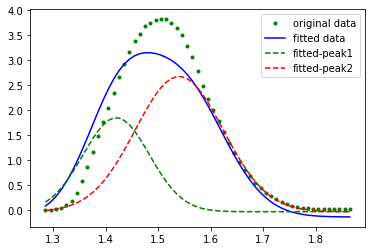

In [13]:
# the two peaks
z1 = gaussian(data[:,0],optim2[0],1.42,optim2[1],optim2[4]/2)
z2 = gaussian(data[:,0],optim2[2],1.54,optim2[3],optim2[4]/2)
z = z1 + z2 + optim2[4]
# plt graph
plt.plot(data[:,0], data[:,1],'g.' ,label='original data')
#plt.plot(data[:,0] ,two_gaussians(data[:,1], *optim2) ,'r.', label='fitted')
plt.plot(data[:,0] ,z ,'b-', label='fitted data')
plt.plot(data[:,0],z1,'g--', label='fitted-peak1')
plt.plot(data[:,0],z2,'r--', label='fitted-peak2')
plt.legend(loc='best')
plt.savefig('fix-nu.png')

In [14]:
# calculate err
err2 = np.sqrt(errfunc2(optim2, data[:,0], data[:,1])).sum()
print('Residual error when fitting 2 Gaussians: {}'.format(err2))

Residual error when fitting 2 Gaussians: 3.7057321749608167
